In [30]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile
import matplotlib.pyplot as plt


In [25]:
# Get all school districts in the US 
lea = pd.read_csv("lea_characteristics.csv", sep=",")

# Get our banned books + districts
df_school_yr_1 = pd.read_csv("PEN_July_1_2021_June_30_2022.csv", sep=",")
df_school_yr_2 = pd.read_csv("PEN_July_1_2022_December_31_2022.csv", sep=",")
books = df_school_yr_1.append(df_school_yr_2)

<ipython-input-25-6b937973bd52>:2: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  lea = pd.read_csv("lea_characteristics.csv", sep=",")
<ipython-input-25-6b937973bd52>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = df_school_yr_1.append(df_school_yr_2)


In [26]:
texas_books = books.loc[books["State"] == "Texas"]

# Replace all instances of Independent school district with ISD
texas_books["District"] = texas_books["District"].str.lower()
texas_books["District"] = texas_books["District"].str.replace('independent school district', 'isd', case=False)
texas_districts = texas_books.groupby(by="District")["Title"].count().reset_index()
texas_districts

<ipython-input-26-9fab774ccbd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_books["District"] = texas_books["District"].str.lower()
<ipython-input-26-9fab774ccbd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_books["District"] = texas_books["District"].str.replace('independent school district', 'isd', case=False)


,District,Title
0,belton isd,10
1,birdville isd,14
2,canutillo isd,1
3,clear creek isd,7
4,conroe isd,10
5,cypress-fairbanks isd,16
6,denton isd,1
7,fort bend isd,1
8,fredericksburg isd,42
9,frisco isd,322


In [27]:
shapefile_path = "texas_school_dist_map/Current_Districts_2023.shp"
gdf = gpd.read_file(shapefile_path)

In [34]:
gdf["District"] = gdf["NAME"].str.lower()
map_df = gdf.merge(texas_districts, on="District", how="left")
map_df["Title"] = map_df["Title"].fillna(0)

map_df

,FID,GEOID20,NAME20,SDLEA,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape__Are,Shape__Len,geometry,District,Title
0,1,4832280,Nederland Independent School District,32280,Nederland ISD,Nederland,123905,123-905,123905,4832280,3,4.892176e+07,35287.497847,"POLYGON ((-94.04917 29.96124, -94.04914 29.965...",nederland isd,0.0
1,2,4838490,Sabine Pass Independent School District,38490,Sabine Pass ISD,Sabine Pass,123913,123-913,123913,4838490,1,9.863762e+08,194516.903820,"POLYGON ((-94.35550 29.72861, -94.34821 29.728...",sabine pass isd,0.0
2,3,4811040,Boys Ranch Independent School District,11040,Boys Ranch ISD,Boys Ranch,180901,180-901,180901,4811040,7,1.272250e+06,4542.875206,"POLYGON ((-102.26001 35.52919, -102.25986 35.5...",boys ranch isd,0.0
3,4,4821300,Grady Independent School District,21300,Grady ISD,Grady,156905,156-905,156905,4821300,6,7.940717e+08,174729.635533,"POLYGON ((-102.21112 32.32685, -102.21112 32.3...",grady isd,0.0
4,5,4845420,Wheeler Independent School District,45420,Wheeler ISD,Wheeler,242903,242-903,242903,4845420,6,4.762594e+08,155879.687605,"POLYGON ((-100.55690 35.38839, -100.55013 35.3...",wheeler isd,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1014,4818810,Everman Independent School District,18810,Everman ISD,Everman,220904,220-904,220904,4818810,4,4.654191e+07,50205.734813,"POLYGON ((-97.30905 32.66954, -97.30880 32.669...",everman isd,0.0
1014,1015,4820960,Godley Independent School District,20960,Godley ISD,Godley,126911,126-911,126911,4820960,6,3.211704e+08,139973.975169,"POLYGON ((-97.53224 32.59735, -97.53227 32.596...",godley isd,0.0
1015,1016,4819700,Fort Worth Independent School District,19700,Fort Worth ISD,Fort Worth,220905,220-905,220905,4819700,3,5.422589e+08,253181.752455,"POLYGON ((-97.49068 32.86732, -97.49041 32.867...",fort worth isd,0.0
1016,1017,4812180,Burleson Independent School District,12180,Burleson ISD,Burleson,126902,126-902,126902,4812180,6,1.303741e+08,81925.373915,"POLYGON ((-97.29639 32.59136, -97.29640 32.591...",burleson isd,0.0


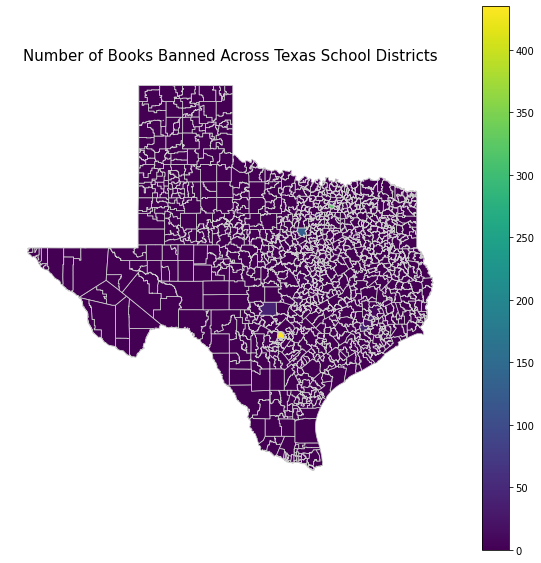

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map_df.plot(column='Title', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels and title
ax.set_title('Number of Books Banned Across Texas School Districts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

# Show the plot
plt.show()

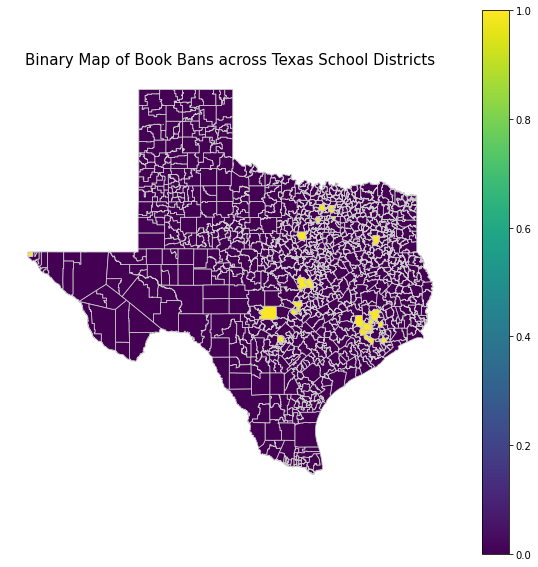

In [42]:
binary_map = map_df.copy()
binary_map['book_ban_binary'] = (binary_map['Title'] > 0).astype(int)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
binary_map.plot(column='book_ban_binary', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels and title
ax.set_title('Binary Map of Book Bans across Texas School Districts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

# Show the plot
plt.show()